## TSF DS Internship, July 2020, Task 1 : To Explore Supervised Machine Learning

Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

Dataset: http://bit.ly/w-data

File type: csv

Variables: 

Hours: Number of hours studied

Scores: Percentage of marks scored

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('http://bit.ly/w-data')

In [76]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [78]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000296BDD85348>,
      dtype=object)

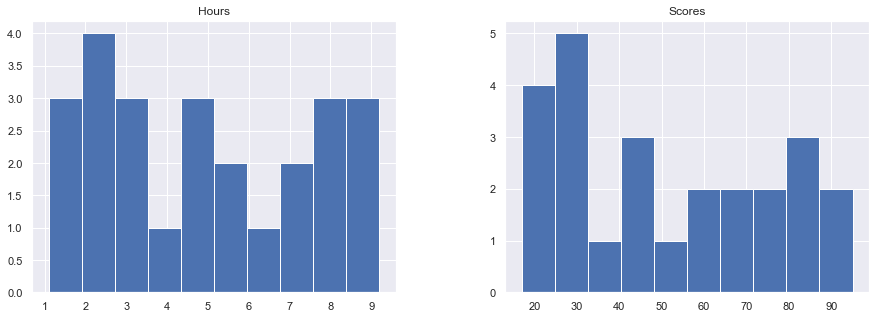

In [79]:
df.select_dtypes(include=['float64', 'int64']).hist(bins=10, figsize=(15, 5))

Hours and Scores are well distributed

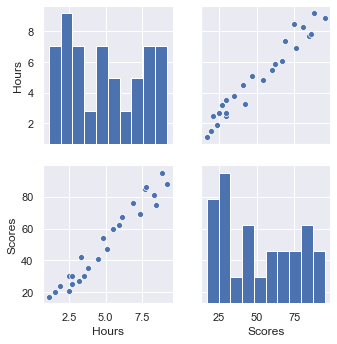

In [80]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))

There is a distinct correlation between Hours and Scores

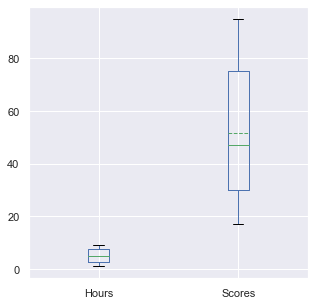

In [81]:
df.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=(5,5), layout=None, return_type=None, showmeans=True, meanline=True)

There are no statistical outliers

In [82]:
X = df['Hours']
y = df['Scores']

In [83]:
import statsmodels.api as sm

In [84]:
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
result = model.fit()
result.summary()

d:\programfiles_x64\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           9.13e-17
Time:                        01:50:41   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model is able to explain 95.3% of the variance. The overall fit of the model is significant, but the intercept value is not significant.

In [85]:
y_pred = result.predict(X_sm)

In [86]:
residual = (y - y_pred)

d:\programfiles_x64\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


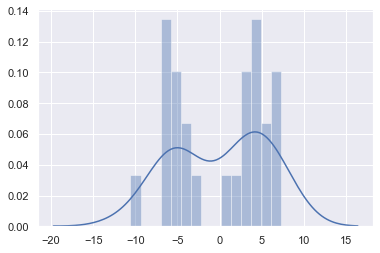

In [87]:
sns.set()
sns.distplot(residual, bins = 15)

Residuals seem to be centered around 0, but its not a normal distribution

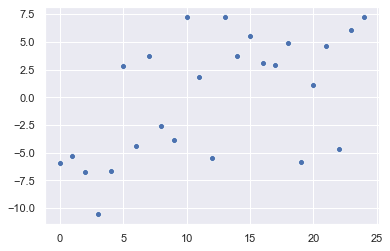

In [88]:
sns.scatterplot(x=residual.index, y=residual)

There doesn't seem to be any discernible pattern in the residual values

In [89]:
print('Mean Absolute Error:', sm.tools.eval_measures.meanabs(y, y_pred))

Mean Absolute Error: 4.972805319866379


In [90]:
print("Predicted Score for 9.25 hours of study = {}".format(result.predict([1, 9.25])[0]))

Predicted Score for 9.25 hours of study = 92.90985477015728


#### Re-modelling without the intercept

In [91]:
model2 = sm.OLS(y, X)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Scores   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2579.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                    6.10e-26
Time:                        01:51:56   Log-Likelihood:                         -78.026
No. Observations:                  25   AIC:                                      158.1
Df Residuals:                      24   BIC:                                      159.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours         10.1743      0.200     50.787      0.000       9.761      10.588
==============================================================================
Omnibus:                        4.755   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                2.042
Skew:                          -0.363   Prob(JB):                        0.360
Kurtosis:                       1.803   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model is able to explain 99.1% of the variance, the coefficient of Hours is significant, and the over-all model fit is also significant.

In [92]:
y2_pred = result2.predict(X)

In [93]:
residual2 = (y - y2_pred)

d:\programfiles_x64\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


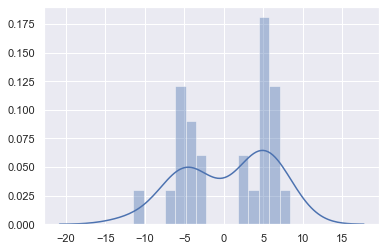

In [94]:
sns.set()
sns.distplot(residual2, bins = 15)

Residuals seem to be centered around 0, but its not a normal distribution. This seems to be due to the data. Perhaps applying a transformation on Hours can eliminate this.

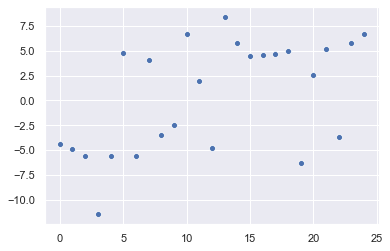

In [95]:
sns.scatterplot(x=residual2.index, y=residual2)

There doesn't seem to be any discernible pattern in the resudual values

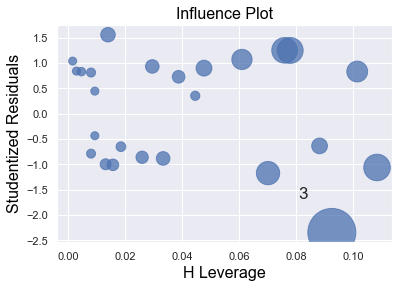

In [96]:
sm.graphics.influence_plot(result2)
plt.show()

Data point 3 seems to have a higher influence than the rest of the data and may be an anomaly

In [97]:
print('Mean Absolute Error:', sm.tools.eval_measures.meanabs(y, y2_pred)) 

Mean Absolute Error: 5.14493476563


In [98]:
print("Predicted Score for 9.25 hours of study = {}".format(result2.predict([9.25])[0]))

Predicted Score for 9.25 hours of study = 94.111877904818
